In [391]:
from imblearn.over_sampling import SMOTE

In [392]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline 

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("Housing.csv")

In [393]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [394]:
# Check the data types of each column and tells you how many rows and columns. There are ints and categorical values only
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [395]:
#print out the columns with missing values in descending order. we can see there are none
missing_values = df.isnull().sum()
highest_counts = missing_values.sort_values(ascending=False)
highest_counts[highest_counts>0]

Series([], dtype: int64)

Use one-Hot encoding to convert the categorical values into numerical

In [396]:
#creating dataset with categorical value
string = df.select_dtypes(object)
string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mainroad          545 non-null    object
 1   guestroom         545 non-null    object
 2   basement          545 non-null    object
 3   hotwaterheating   545 non-null    object
 4   airconditioning   545 non-null    object
 5   prefarea          545 non-null    object
 6   furnishingstatus  545 non-null    object
dtypes: object(7)
memory usage: 29.9+ KB


In [397]:
df=pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False, dtype=int)

In [398]:
df=pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' ], drop_first=True, dtype=int)

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   furnishingstatus_furnished       545 non-null    int32
 7   furnishingstatus_semi-furnished  545 non-null    int32
 8   furnishingstatus_unfurnished     545 non-null    int32
 9   mainroad_yes                     545 non-null    int32
 10  guestroom_yes                    545 non-null    int32
 11  basement_yes                     545 non-null    int32
 12  hotwaterheating_yes              545 non-null    i

In [400]:
df.to_csv('df.csv', index=False) #output to df.csv to help me analyse

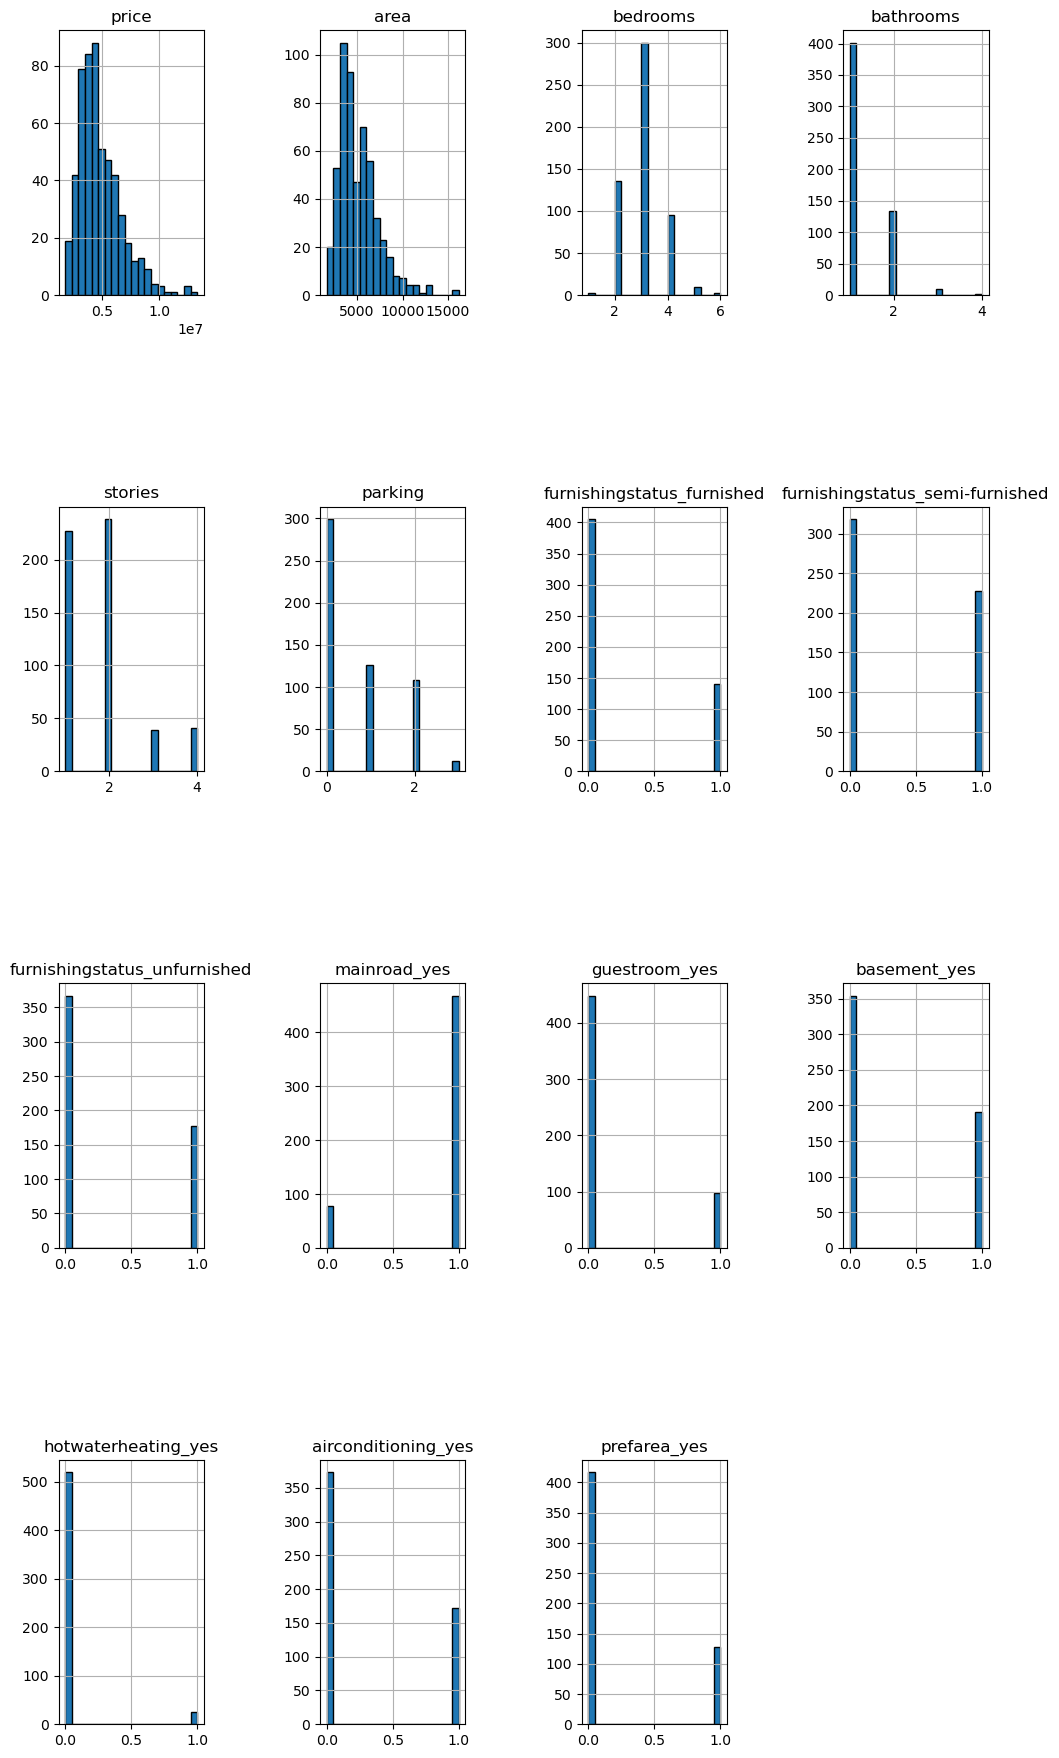

In [401]:
df.hist(
    bins=20, figsize=(12, 22), edgecolor="black"
)
plt.subplots_adjust(hspace=0.8, wspace=0.8)

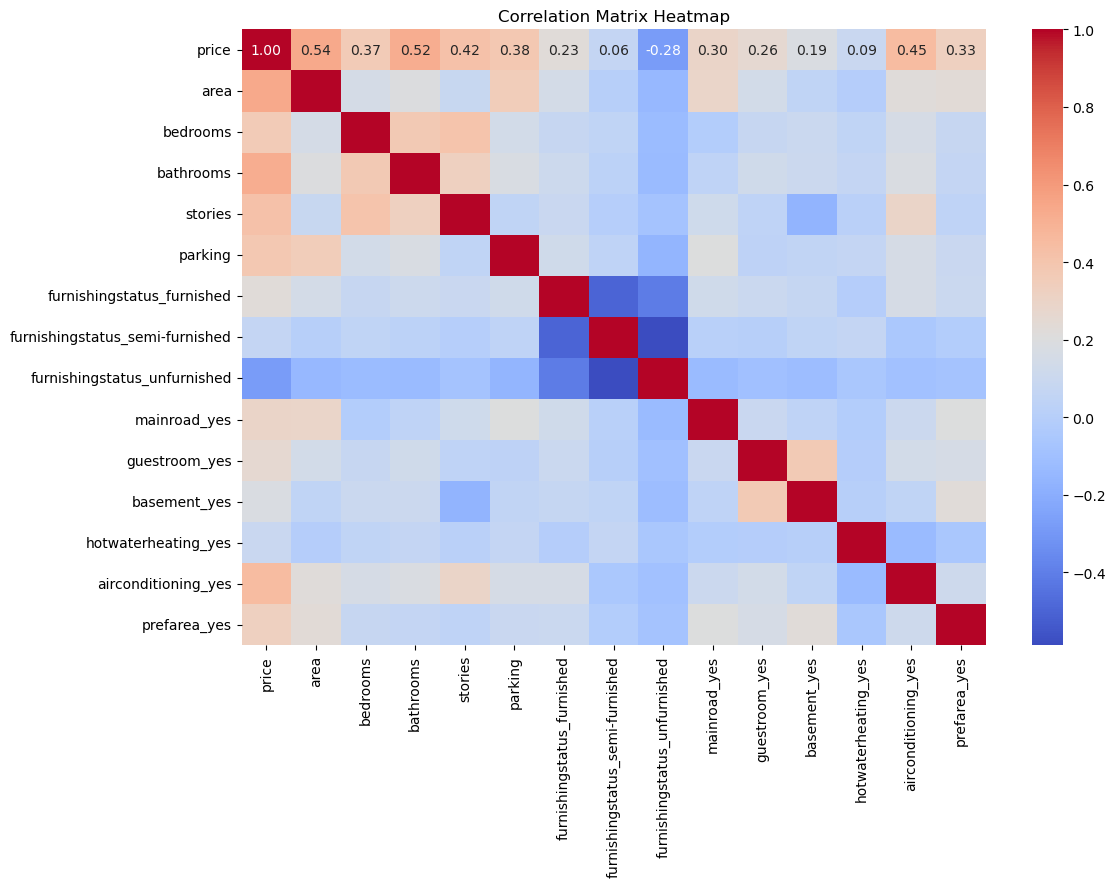

In [402]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

The heatmap shows a decent correlation between the size of the property and price as well as the number of bathrooms (the more the higher the price), the presence of airconditioning and the number of stories there are (again the more stories, the higher the price). There seems to be a link between the price and if its unfurnished meaning it will be worth less. Variables we can definitely ignore as they make little to know difference would be if it's semi-furnished and if there is hot-water available.

In [403]:
#resetting the index of df
df.reset_index(drop=True,inplace=True)

In [404]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['price'])
y = df['price']

In [405]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [406]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [436]:
from sklearn.model_selection import train_test_split, StratifiedKFold
# Initialize the kNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=9)

# Initialize Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross-Validation and calculate R^2 scores
r2_scores = []
for train_index, val_index in skf.split(X_train_scaled, y_train):
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]
    knn_regressor.fit(X_train_cv, y_train_cv)
    y_pred_cv = knn_regressor.predict(X_val_cv)
    r2_cv = r2_score(y_val_cv, y_pred_cv)
    r2_scores.append(r2_cv)

# Calculate the mean R^2 score
mean_r2_score = sum(r2_scores) / len(r2_scores)

print("Mean R^2 Score (Stratified K-Fold CV):", mean_r2_score)

# Train the model
knn_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print(f"r2 Score: {r2}")
print("Mean Absolute Error:", mae)

Mean R^2 Score (Stratified K-Fold CV): 0.27447525392483973
Mean Squared Error: 1634148909740.4092
r2 Score: 0.62052938776422
Mean Absolute Error: 906364.6476964769


In [431]:
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Perform k-fold cross-validation (e.g., with k=3)
k = 3
mse_scores = cross_val_score(linear_regressor, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(linear_regressor, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(linear_regressor, X_train, y_train, cv=k, scoring='r2')

# Convert the negative MSE and MAE scores to positive values
mse_scores = -mse_scores
mae_scores = -mae_scores

# Calculate the mean of each metric across all folds
mean_mse = np.mean(mse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

# Calculate the mean R^2 score
mean_r2_score = scores.mean()


print(f"Mean Squared Error (across {k}-fold CV): {mean_mse}")
print(f"Mean Absolute Error (across {k}-fold CV): {mean_mae}")
print(f"R2 Score (across {k}-fold CV): {mean_r2}")

Mean Squared Error (across 3-fold CV): 1089993966703.1519
Mean Absolute Error (across 3-fold CV): 769998.3730578814
R2 Score (across 3-fold CV): 0.6453991799788914


In [435]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df2 = pd.read_csv("Housing.csv")

df2=pd.get_dummies(df2, columns=['furnishingstatus'], drop_first=False, dtype=int)
df2=pd.get_dummies(df2, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' ], drop_first=True, dtype=int)

X = df2.drop(columns=['price'])
y = df2['price']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])

# Define parameter grids for hyperparameter tuning
linear_param_grid = {
    'regressor__fit_intercept': [True, False]
}

knn_param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 9, 11],
    'regressor__weights': ['uniform', 'distance']
}

# Perform GridSearchCV for Linear Regression
linear_grid_search = GridSearchCV(linear_pipeline, param_grid=linear_param_grid, cv=5, scoring='neg_mean_squared_error')
linear_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for kNN
knn_grid_search = GridSearchCV(knn_pipeline, param_grid=knn_param_grid, cv=5, scoring='neg_mean_squared_error')
knn_grid_search.fit(X_train, y_train)

# Evaluate best models on the test set
linear_best_model = linear_grid_search.best_estimator_
knn_best_model = knn_grid_search.best_estimator_

linear_y_pred = linear_best_model.predict(X_test)
knn_y_pred = knn_best_model.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)
linear_mae = mean_absolute_error(y_test, linear_y_pred)

knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
knn_mae = mean_absolute_error(y_test, knn_y_pred)

print("Linear Regression - Mean Squared Error:", linear_mse)
print("Linear Regression - R^2 Score:", linear_r2)
print("Linear Regression - Mean Absolute Error:", linear_mae)

print("\nk-Nearest Neighbors - Mean Squared Error:", knn_mse)
print("k-Nearest Neighbors - R^2 Score:", knn_r2)
print("k-Nearest Neighbors - Mean Absolute Error:", knn_mae)

print("\nBest parameters for Linear Regression:", linear_grid_search.best_params_)
print("Best parameters for k-Nearest Neighbors:", knn_grid_search.best_params_)


Linear Regression - Mean Squared Error: 1523019469501.29
Linear Regression - R^2 Score: 0.6463350878895879
Linear Regression - Mean Absolute Error: 920392.9397607954

k-Nearest Neighbors - Mean Squared Error: 1600300680470.572
k-Nearest Neighbors - R^2 Score: 0.6283893864507304
k-Nearest Neighbors - Mean Absolute Error: 896798.4386174417

Best parameters for Linear Regression: {'regressor__fit_intercept': True}
Best parameters for k-Nearest Neighbors: {'regressor__n_neighbors': 9, 'regressor__weights': 'distance'}


As you can see, Linear Regression performs slightly better than kNN when looking at the R2 score. The optimal values for kNN are 6 Neighbours and 6 splits and the optimal values for Linear Regression is 3 folds

In [335]:
data_to_predict = [[7000, 2, 2, 3, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1]]
predictions=knn_regressor.predict(data_to_predict)
# Print the predictions
print("Predicted price:", predictions)

Predicted price: [6216000.]
